<a href="https://colab.research.google.com/github/adityarezanugraha/dqlab-learning/blob/main/Data_Science_in_Telco_Data_Cleansing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Ini adalah contoh kasus yang dipelajari di platform DQLab dalam Data Cleansing menggunakan contoh dataset dari sebuah perusahaan telekomunikasi.

Kasus: 
Perusahaan Telco ingin melihat data pelanggan yang akan beralih ke kompetitor lain dengan label **kolom Churn**.

credit untuk tutor kak <b>Shofiyyah Nadhiroh</b>

# Import Library

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Import Dataset

In [2]:
pd.options.display.max_columns = 50

df_load = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/dqlab_telco.csv')

df_load

,UpdatedAt,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,202006,45759018157,Female,0,Yes,No,1.0,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,202006,45557574145,Male,0,No,No,34.0,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,202006,45366876421,Male,0,No,No,2.0,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,202006,45779536532,Male,0,No,No,45.0,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,202006,45923787906,Female,0,No,No,2.0,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7108,202006,45117219093,Male,0,Yes,Yes,53.0,Yes,Yes,DSL,Yes,Yes,No,No,No,Yes,Two year,No,Bank transfer (automatic),69.70,3686.05,NaN
7109,202006,45564915800,Female,0,No,No,12.0,Yes,No,Fiber optic,No,No,Yes,No,Yes,Yes,One year,No,Mailed check,95.50,1115.15,NaN
7110,202006,45655964195,Male,0,No,No,26.0,Yes,No,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,98.65,2537.00,NaN
7111,202006,45899251814,Male,0,No,No,21.0,Yes,No,DSL,No,No,Yes,No,No,Yes,Month-to-month,No,Mailed check,61.65,1393.60,NaN


In [3]:
df_load.shape

(7113, 22)

In [4]:
df_load.customerID.nunique()

7017

In [5]:
df_load.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7113 entries, 0 to 7112
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   UpdatedAt         7113 non-null   int64  
 1   customerID        7113 non-null   object 
 2   gender            7113 non-null   object 
 3   SeniorCitizen     7113 non-null   int64  
 4   Partner           7113 non-null   object 
 5   Dependents        7113 non-null   object 
 6   tenure            7014 non-null   float64
 7   PhoneService      7113 non-null   object 
 8   MultipleLines     7113 non-null   object 
 9   InternetService   7113 non-null   object 
 10  OnlineSecurity    7113 non-null   object 
 11  OnlineBackup      7113 non-null   object 
 12  DeviceProtection  7113 non-null   object 
 13  TechSupport       7113 non-null   object 
 14  StreamingTV       7113 non-null   object 
 15  StreamingMovies   7113 non-null   object 
 16  Contract          7113 non-null   object 


# Memfilter ID Number Pelanggan Format Tertentu

In [6]:
# mengecek jika ada valid_id yang terdiri dari 11/12 karakter yg didahului angka 45 didepannya, set True
df_load['valid_id'] = df_load['customerID'].astype(str).str.match(r'(45\d{9,10})')

# membuang valid id selain kriteria diatas.. axis=1 membuang valid id yg tidak sesuai 
df_load = (df_load[df_load['valid_id'] == True]).drop('valid_id', axis = 1)

df_load

,UpdatedAt,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,202006,45759018157,Female,0,Yes,No,1.0,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,202006,45557574145,Male,0,No,No,34.0,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,202006,45366876421,Male,0,No,No,2.0,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,202006,45779536532,Male,0,No,No,45.0,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,202006,45923787906,Female,0,No,No,2.0,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7108,202006,45117219093,Male,0,Yes,Yes,53.0,Yes,Yes,DSL,Yes,Yes,No,No,No,Yes,Two year,No,Bank transfer (automatic),69.70,3686.05,NaN
7109,202006,45564915800,Female,0,No,No,12.0,Yes,No,Fiber optic,No,No,Yes,No,Yes,Yes,One year,No,Mailed check,95.50,1115.15,NaN
7110,202006,45655964195,Male,0,No,No,26.0,Yes,No,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,98.65,2537.00,NaN
7111,202006,45899251814,Male,0,No,No,21.0,Yes,No,DSL,No,No,Yes,No,No,Yes,Month-to-month,No,Mailed check,61.65,1393.60,NaN


In [7]:
print('Hasil jumlah ID Customer yang terfilter adalah',df_load['customerID'].count())

Hasil jumlah ID Customer yang terfilter adalah 7006


# Memfilter Duplikasi ID Number Pelanggan

### Duplikasi dikarenakan inserting melebihi satu kali dengan nilai yang sama tiap kolomnya

In [8]:
# mengecek duplikasi yang rows sama 
duplicateRowsDF = df_load[df_load.duplicated(keep=False)]
duplicateRowsDF

,UpdatedAt,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
6578,202006,45389829046,Female,0,No,Yes,10.0,Yes,Yes,DSL,Yes,No,Yes,Yes,No,Yes,One year,No,Credit card (automatic),73.55,693.30,No
6579,202006,45393846634,Male,0,No,No,72.0,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),84.30,5997.10,No
6580,202006,45769613854,Female,0,Yes,Yes,49.0,Yes,No,DSL,No,Yes,Yes,No,Yes,Yes,One year,No,Credit card (automatic),78.00,3824.20,No
6581,202006,45245391649,Female,1,No,No,54.0,Yes,Yes,DSL,No,Yes,No,Yes,Yes,No,One year,No,Mailed check,72.10,3886.05,No
6582,202006,45955898553,Female,0,No,No,71.0,Yes,Yes,Fiber optic,Yes,Yes,Yes,No,Yes,Yes,Two year,Yes,Credit card (automatic),106.75,7283.25,No
6583,202006,45961764656,Female,0,No,No,22.0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.25,412.55,No
6584,202006,45634041360,Female,0,Yes,Yes,50.0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),20.55,1070.25,No
7050,202006,45389829046,Female,0,No,Yes,10.0,Yes,Yes,DSL,Yes,No,Yes,Yes,No,Yes,One year,No,Credit card (automatic),73.55,693.30,No
7051,202006,45393846634,Male,0,No,No,72.0,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),84.30,5997.10,No
7052,202006,45769613854,Female,0,Yes,Yes,49.0,Yes,No,DSL,No,Yes,Yes,No,Yes,Yes,One year,No,Credit card (automatic),78.00,3824.20,No


In [9]:
# menghitung jumlah rows yang terduplikasi
# ada 14 rows masing-masing kolom, yg mana ada 7 data asli dan 7 data duplikat
duplicateRowsDF.count()

UpdatedAt           14
customerID          14
gender              14
SeniorCitizen       14
Partner             14
Dependents          14
tenure              14
PhoneService        14
MultipleLines       14
InternetService     14
OnlineSecurity      14
OnlineBackup        14
DeviceProtection    14
TechSupport         14
StreamingTV         14
StreamingMovies     14
Contract            14
PaperlessBilling    14
PaymentMethod       14
MonthlyCharges      14
TotalCharges        14
Churn               14
dtype: int64

In [10]:
# membuang data yang terduplikasi
df_load.drop_duplicates(inplace=True)

df_load

,UpdatedAt,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,202006,45759018157,Female,0,Yes,No,1.0,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,202006,45557574145,Male,0,No,No,34.0,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,202006,45366876421,Male,0,No,No,2.0,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,202006,45779536532,Male,0,No,No,45.0,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,202006,45923787906,Female,0,No,No,2.0,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7108,202006,45117219093,Male,0,Yes,Yes,53.0,Yes,Yes,DSL,Yes,Yes,No,No,No,Yes,Two year,No,Bank transfer (automatic),69.70,3686.05,NaN
7109,202006,45564915800,Female,0,No,No,12.0,Yes,No,Fiber optic,No,No,Yes,No,Yes,Yes,One year,No,Mailed check,95.50,1115.15,NaN
7110,202006,45655964195,Male,0,No,No,26.0,Yes,No,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,98.65,2537.00,NaN
7111,202006,45899251814,Male,0,No,No,21.0,Yes,No,DSL,No,No,Yes,No,No,Yes,Month-to-month,No,Mailed check,61.65,1393.60,NaN


### Duplikasi dikarenakan inserting beda periode pengambilan data

In [11]:
duplicateRowsCID = df_load[df_load.customerID.duplicated(keep=False)]
duplicateRowsCID

,UpdatedAt,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
16,202006,45819132957,Female,0,No,No,52.0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,20.65,1022.95,No
17,202006,45995925610,Male,0,No,Yes,71.0,Yes,Yes,Fiber optic,Yes,No,Yes,No,Yes,Yes,Two year,No,Bank transfer (automatic),106.70,7382.25,No
18,202006,45419036262,Female,0,Yes,Yes,10.0,Yes,No,DSL,No,No,Yes,Yes,No,No,Month-to-month,No,Credit card (automatic),55.20,528.35,Yes
19,202006,45418334682,Female,0,No,No,21.0,Yes,No,Fiber optic,No,Yes,Yes,No,No,Yes,Month-to-month,Yes,Electronic check,90.05,1862.90,No
20,202006,45877978431,Male,1,No,No,1.0,No,No phone service,DSL,No,No,Yes,No,No,Yes,Month-to-month,Yes,Electronic check,39.65,39.65,Yes
21,202006,45168014322,Male,0,Yes,No,12.0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Bank transfer (automatic),19.80,202.25,No
7044,202005,45819132957,Female,0,No,No,52.0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,20.65,1022.95,Yes
7045,202005,45995925610,Male,0,No,Yes,71.0,Yes,Yes,Fiber optic,Yes,No,Yes,No,Yes,Yes,Two year,No,Bank transfer (automatic),106.70,7702.25,No
7046,202005,45419036262,Female,0,Yes,Yes,10.0,Yes,No,DSL,No,No,Yes,Yes,No,No,Month-to-month,No,Credit card (automatic),60.20,528.35,Yes
7047,202005,45418334682,Female,0,No,No,21.0,Yes,No,Fiber optic,No,Yes,Yes,No,No,Yes,Month-to-month,Yes,Electronic check,180.05,1862.90,No


In [12]:
duplicateRowsCID.count()

UpdatedAt           12
customerID          12
gender              12
SeniorCitizen       12
Partner             12
Dependents          12
tenure              12
PhoneService        12
MultipleLines       12
InternetService     12
OnlineSecurity      12
OnlineBackup        12
DeviceProtection    12
TechSupport         12
StreamingTV         12
StreamingMovies     12
Contract            12
PaperlessBilling    12
PaymentMethod       12
MonthlyCharges      12
TotalCharges        12
Churn               12
dtype: int64

In [13]:
# membuang id customer yang terduplikasi karena inserting data. 
# sort berdasarkan update at paling akhir (data update terbaru)
df_load = df_load.sort_values('UpdatedAt', ascending=False).drop_duplicates(['customerID'])

df_load

,UpdatedAt,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,202006,45759018157,Female,0,Yes,No,1.0,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
4722,202006,45758152256,Female,0,No,No,60.0,Yes,No,DSL,No,Yes,Yes,Yes,Yes,No,One year,Yes,Credit card (automatic),70.15,4224.70,No
4734,202006,45410681487,Male,0,Yes,Yes,39.0,Yes,No,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,No,Credit card (automatic),80.00,3182.95,Yes
4733,202006,45131942507,Male,0,Yes,No,12.0,Yes,No,Fiber optic,Yes,Yes,Yes,No,No,No,Month-to-month,Yes,Electronic check,84.60,959.90,No
4732,202006,45105270921,Female,0,Yes,Yes,71.0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),19.90,1397.30,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2364,202006,45455962980,Male,0,Yes,No,14.0,Yes,Yes,Fiber optic,No,Yes,Yes,No,No,No,Month-to-month,Yes,Electronic check,82.65,1185.00,No
2363,202006,45437311872,Male,0,No,No,1.0,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,44.75,44.75,No
2362,202006,45798912758,Male,0,Yes,Yes,49.0,No,No phone service,DSL,Yes,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,39.20,1838.15,No
2361,202006,45510338384,Female,0,No,Yes,1.0,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,No,Mailed check,45.95,45.95,Yes


In [14]:
print('Hasil jumlah ID Customer yang sudah dihilangkan duplikasinya (distinct) adalah',df_load['customerID'].count())

Hasil jumlah ID Customer yang sudah dihilangkan duplikasinya (distinct) adalah 6993


# Mengatasi Missing Values dengan Penghapusan Rows

In [15]:
# mengecek apakah ada data yang missing values tiap-tiap kolom
df_load.isnull().sum()

UpdatedAt            0
customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure              99
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges      26
TotalCharges        15
Churn               43
dtype: int64

In [16]:
print('Total missing values data dari kolom Churn',df_load['Churn'].isnull().sum())

Total missing values data dari kolom Churn 43


In [17]:
# menghapus missing value pada kolom Churn
df_load.dropna(subset=['Churn'],inplace=True)

df_load

,UpdatedAt,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,202006,45759018157,Female,0,Yes,No,1.0,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
4722,202006,45758152256,Female,0,No,No,60.0,Yes,No,DSL,No,Yes,Yes,Yes,Yes,No,One year,Yes,Credit card (automatic),70.15,4224.70,No
4734,202006,45410681487,Male,0,Yes,Yes,39.0,Yes,No,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,No,Credit card (automatic),80.00,3182.95,Yes
4733,202006,45131942507,Male,0,Yes,No,12.0,Yes,No,Fiber optic,Yes,Yes,Yes,No,No,No,Month-to-month,Yes,Electronic check,84.60,959.90,No
4732,202006,45105270921,Female,0,Yes,Yes,71.0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),19.90,1397.30,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2364,202006,45455962980,Male,0,Yes,No,14.0,Yes,Yes,Fiber optic,No,Yes,Yes,No,No,No,Month-to-month,Yes,Electronic check,82.65,1185.00,No
2363,202006,45437311872,Male,0,No,No,1.0,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,44.75,44.75,No
2362,202006,45798912758,Male,0,Yes,Yes,49.0,No,No phone service,DSL,Yes,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,39.20,1838.15,No
2361,202006,45510338384,Female,0,No,Yes,1.0,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,No,Mailed check,45.95,45.95,Yes


In [18]:
print('Total Rows dan kolom Data setelah dihapus data Missing Values adalah',df_load.shape)

Total Rows dan kolom Data setelah dihapus data Missing Values adalah (6950, 22)


# Mengatasi Missing Values dengan Pengisian Nilai tertentu

In [19]:
# mengecek status missing value dengan mengembalikan nilai True jika masih ada data missing value
print('Status Missing Values :',df_load.isnull().values.any())

print('\nJumlah Missing Values masing-masing kolom, adalah:')
print(df_load.isnull().sum().sort_values(ascending=False)) # print berdasarkan urutan jumlah missing value terbesar

Status Missing Values : True

Jumlah Missing Values masing-masing kolom, adalah:
tenure              99
MonthlyCharges      26
TotalCharges        15
Churn                0
InternetService      0
customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
PhoneService         0
MultipleLines        0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
UpdatedAt            0
dtype: int64


### Tenure pihak data modeller meminta setiap rows yang memiliki missing values untuk Lama berlangganan di isi dengan 11

In [20]:
# mengisi nilai dari data NaN di kolom Tenure dengan nilai 11 sesuai kesepakatan dengan business analyst
df_load['tenure'].fillna(11, inplace=True)

### Variable yang bersifat numeric selain Tenure di isi dengan median dari masing-masing variable tersebut

In [21]:
# menggunakan looping dalam mengisi nilai pada kolom MonthlyCharges dan TotalCharges
# diisi dengan nilai median masing-masing kolom
for col_name in list(['MonthlyCharges','TotalCharges']):
    median = df_load[col_name].median()
    df_load[col_name].fillna(median, inplace=True)

In [22]:
# cek apakah kolom monthly charges dan total charges masih ada missing value NaN
print('Jumlah Missing Values setelah di imputer datanya, adalah:')
print(df_load.isnull().sum().sort_values(ascending=False))

Jumlah Missing Values setelah di imputer datanya, adalah:
Churn               0
TotalCharges        0
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
UpdatedAt           0
dtype: int64


# Mendeteksi adanya Outlier (Boxplot)

In [23]:
# setelah mengecek missing value dan sudah tidak ada data yang bernilai NaN,
# cek apakah ada data pencilan (outlier) pada kolom tenure, monthly charges dan total charges
print('\nPersebaran data sebelum ditangani Outlier: ')
print(df_load[['tenure','MonthlyCharges','TotalCharges']].describe())


Persebaran data sebelum ditangani Outlier: 
            tenure  MonthlyCharges  TotalCharges
count  6950.000000     6950.000000   6950.000000
mean     32.477266       65.783741   2305.083460
std      25.188910       50.457871   2578.651143
min       0.000000        0.000000     19.000000
25%       9.000000       36.462500    406.975000
50%      29.000000       70.450000   1400.850000
75%      55.000000       89.850000   3799.837500
max     500.000000     2311.000000  80000.000000


### Tenure

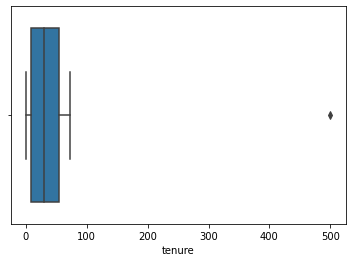

In [24]:
# menggunakan library seaborn untuk melihat data outlier pada kolom tenure
plt.figure()
sns.boxplot(x=df_load['tenure'])
plt.show()

### Monthly Charges

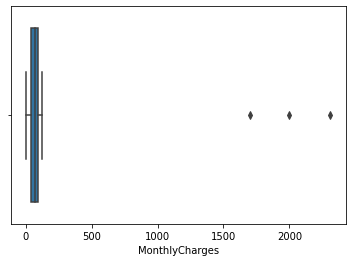

In [25]:
# menggunakan library seaborn untuk melihat data outlier pada kolom Monthly Charges
plt.figure()
sns.boxplot(x=df_load['MonthlyCharges'])
plt.show()

### Total Charges

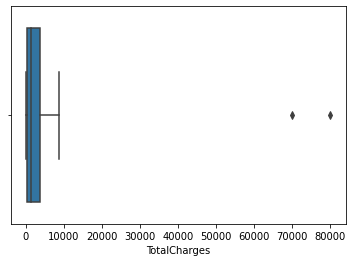

In [26]:
# menggunakan library seaborn untuk melihat data outlier pada kolom Total Charges
plt.figure()
sns.boxplot(x=df_load['TotalCharges'])
plt.show()

# Mengatasi Outlier

In [27]:
# menghitung nilai Quartile 1 dan Quartile 3 pada masing - masing kolom
Q1 = (df_load[['tenure','MonthlyCharges','TotalCharges']]).quantile(0.25)
Q3 = (df_load[['tenure','MonthlyCharges','TotalCharges']]).quantile(0.75)

# hitung nilai Interquartil Range
IQR = Q3 - Q1

In [28]:
# menghitung nilai maximum tiap-tiap kolom
maximum = Q3 + (1.5*IQR)

print('Nilai Maximum dari masing-masing Variable adalah: ')
print(maximum)

Nilai Maximum dari masing-masing Variable adalah: 
tenure             124.00000
MonthlyCharges     169.93125
TotalCharges      8889.13125
dtype: float64


In [29]:
# menghitung nilai minimum tiap-tiap kolom
minimum = Q1 - (1.5*IQR)

print('\nNilai Minimum dari masing-masing Variable adalah: ')
print(minimum)


Nilai Minimum dari masing-masing Variable adalah: 
tenure             -60.00000
MonthlyCharges     -43.61875
TotalCharges     -4682.31875
dtype: float64


In [30]:
# membuat variabel untuk menentukan data yang lebih dari nilai maximum dan kurang dari nilai minimum masing-masing kolom
more_than = (df_load > maximum)
lower_than = (df_load < minimum)

# mereplace semua data yang nilainya lebih dari maximum dengan nilai maximum
df_load = df_load.mask(more_than, maximum, axis=1)

# mereplace semua data yang nilainya kurang dari minimum dengan nilai minimum
df_load = df_load.mask(lower_than, minimum, axis=1)

In [31]:
# cek kembali statistik deskriptif maasing-masing kolom
print('\nPersebaran data setelah ditangani Outlier: ')
print(df_load[['tenure','MonthlyCharges','TotalCharges']].describe())


Persebaran data setelah ditangani Outlier: 
            tenure  MonthlyCharges  TotalCharges
count  6950.000000     6950.000000   6950.000000
mean     32.423165       64.992201   2286.058750
std      24.581073       30.032040   2265.702553
min       0.000000        0.000000     19.000000
25%       9.000000       36.462500    406.975000
50%      29.000000       70.450000   1400.850000
75%      55.000000       89.850000   3799.837500
max     124.000000      169.931250   8889.131250


# Mendeteksi Nilai yang tidak Standar

In [32]:
for col_name in list(['gender','SeniorCitizen','Partner','Dependents','PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod','Churn']):
    print('\nUnique Values Count \033[1m' + 'Before Standardized \033[0m Variable',col_name)
    print(df_load[col_name].value_counts())


Unique Values Count Before Standardized  Variable gender
Male         3499
Female       3431
Wanita         14
Laki-Laki       6
Name: gender, dtype: int64

Unique Values Count Before Standardized  Variable SeniorCitizen
0    5822
1    1128
Name: SeniorCitizen, dtype: int64

Unique Values Count Before Standardized  Variable Partner
No     3591
Yes    3359
Name: Partner, dtype: int64

Unique Values Count Before Standardized  Variable Dependents
No     4870
Yes    2060
Iya      20
Name: Dependents, dtype: int64

Unique Values Count Before Standardized  Variable PhoneService
Yes    6281
No      669
Name: PhoneService, dtype: int64

Unique Values Count Before Standardized  Variable MultipleLines
No                  3346
Yes                 2935
No phone service     669
Name: MultipleLines, dtype: int64

Unique Values Count Before Standardized  Variable InternetService
Fiber optic    3057
DSL            2388
No             1505
Name: InternetService, dtype: int64

Unique Values Count Befor

# Menstandarisasi Variable Kategorik

In [33]:
# kita bisa lihat pada kolom gender, Dependents dan Churn ada nilai yang tidak standar
# sekarang kita replace nilai yang tidak standar, menjadi nilai yang standar
df_load = df_load.replace(['Wanita','Laki-Laki','Churn','Iya'],['Female','Male','Yes','Yes'])

# cek kembali nilai masing-masing kolom apakah sudah standar 
for col_name in list(['gender','Dependents','Churn']):
    print('\nUnique Values Count \033[1m' + 'After Standardized \033[0mVariable',col_name)
    print(df_load[col_name].value_counts())


Unique Values Count After Standardized Variable gender
Male      3505
Female    3445
Name: gender, dtype: int64

Unique Values Count After Standardized Variable Dependents
No     4870
Yes    2080
Name: Dependents, dtype: int64

Unique Values Count After Standardized Variable Churn
No     5114
Yes    1836
Name: Churn, dtype: int64
